
Начнем с небольшого упражнения по Марковским цепям. Пусть мы проводим ежедневные наблюдения за погодой и погода бывает одной из трех типов: солнечной, облачной или дождливой. Опишем все возможные состояния:

In [1]:
state_weather = ("sunny", "cloudy", "rainy")

Пусть статистика многодневных наблюдений показывает, что вероятности перемены (или сохранения) состояния погоды опиcываются следующей мaтрицей переходных вероятностей:

In [2]:
import numpy as np


transition_matrix = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))

Задание 1. Выберите произвольное начальное состояние ("sunny", "cloudy" или "rainy") и смоделируйте 20000 последующих состояний в цепи Маркова с введенной выше матрицей переходов. Результат моделирования (массив размера 20000) запишите в переменную states.

In [3]:
state_weather = ("sunny", "cloudy", "rainy")
import numpy as np

transition_matrix = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))
#для хранения состояний
states = []
begstate = "sunny"
#numpy.random.choice(a, size=None, replace=True, p=None)
# Выбираем следующее состояние по нынешнему(cur) состоянию
def nextstate(cur):
    nextst = np.random.choice(state_weather, p = transition_matrix[state_weather.index(cur)])
    return nextst

#моделруем 20000 состояний
cur = begstate
for _ in range(20000):
    states.append(cur)
    cur = nextstate(cur)
print(states)

['sunny', 'sunny', 'sunny', 'cloudy', 'sunny', 'sunny', 'cloudy', 'cloudy', 'rainy', 'rainy', 'rainy', 'rainy', 'sunny', 'sunny', 'rainy', 'cloudy', 'cloudy', 'sunny', 'sunny', 'cloudy', 'sunny', 'cloudy', 'sunny', 'cloudy', 'rainy', 'rainy', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'cloudy', 'cloudy', 'sunny', 'cloudy', 'cloudy', 'rainy', 'rainy', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'rainy', 'cloudy', 'sunny', 'cloudy', 'cloudy', 'sunny', 'sunny', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'rainy', 'cloudy', 'cloudy', 'sunny', 'sunny', 'cloudy', 'cloudy', 'rainy', 'cloudy', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'rainy', 'rainy', 'cloudy', 'sunny', 'sunny', 'rainy', 'rainy', 'cloudy', 'sunny', 'cloudy', 'cloudy', 'sunny', 'sunny', 'sunny', 'sunny', 'cloudy', 'rainy', 'sunny', 'cloudy', 'rainy', 'rainy', 'rainy', 'rainy', 'cloudy', 'sunny', 'cloudy', 'sunny', 'sunny', 'sunny', 'sunny', 'cloudy', 'rainy', 'cloudy', 'sunny', 'clou

Задание 2. На основе массива states рассчитайте, как меняется частота встречаемости каждого из типов погоды в массиве states[:n] для n, возрастающих от 1 до 20000. На одном рисунке покажите 3 графика: по оси х откладывайте n, по у - частоту для каждого из трех типов погоды. Должна получиться примерно следующая картинка: 


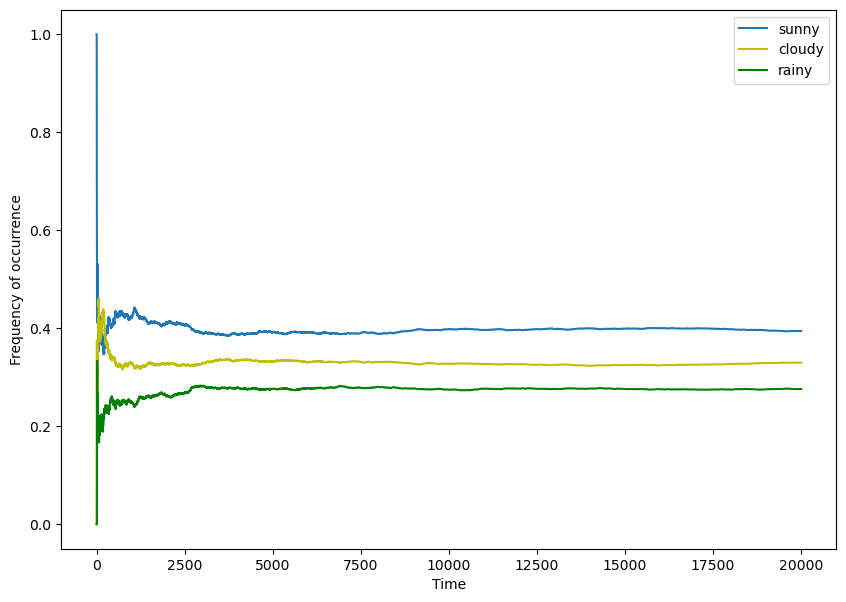

In [40]:
import matplotlib.pyplot as plt
sunnycount = []
cloudycount = []
rainycount = []
inds = 0
indc = 0
indr = 0
for i in range(1, 20001):
    if states[i-1] == 'sunny':
        inds = 1 + inds
    if states[i-1] == 'cloudy':
        indc = indc + 1
    if states[i-1] == 'rainy':
        indr = indr + 1
    sunnycount.append(inds)
    cloudycount.append(indc)
    rainycount.append(indr)
plt.figure(figsize=(10, 7))
plt.plot(np.arange(1, 20001), sunnycount/np.arange(1, 20001) , label='sunny')
plt.plot(np.arange(1, 20001), cloudycount/np.arange(1, 20001), c='y', label='cloudy')
plt.plot(np.arange(1, 20001), rainycount/np.arange(1, 20001), c='g', label='rainy')
plt.xlabel('Time')#в марковских цепях с дискр временем момент времени и шаг - одно и то же
plt.ylabel('Frequency of occurrence')
plt.legend()
plt.show()

Задание 3. Как следует из картинки, частоты сходятся к некоторым стационарным значениям. Убедитесь, что эти значения совпадают с решением уравнения на стационарную плотность πP=π, где P - это матрица переходных вероятностей, а вектор π - искомая стационарная плотность. Дополнительно убедитесь, это этот же вектор возникает в строках матрицы P, при возведении ее во все большие степени.

Solved for π:  πP=π [0.38888889 0.33333333 0.27777778]
Stationar value: [0.0008645061728395062, 0.0006814814814814815, 0.0005540123456790123]


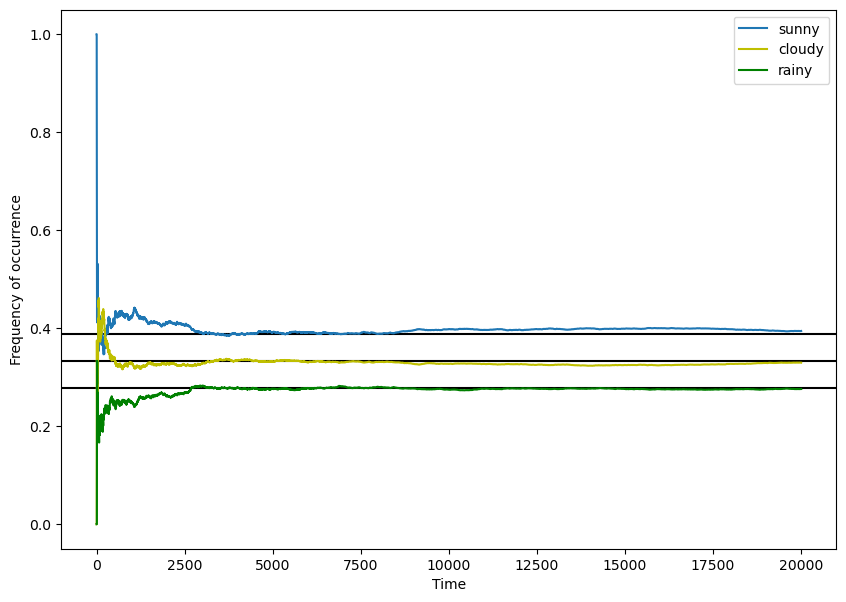

In [67]:
index1 = 0
index2 = 0
mu=np.zeros(3*20000).reshape(20000,3)
mu[0]=[1,0,0]#распределение в 0 момент времени, те с какой ветояностью в i-ый момент времени состояние будет s, c, r, соотвественно
t=0
mu2 =np.ones(3) 
for i in range(1, 20000):
    mu[i] = mu[i-1].dot(transition_matrix)
    for j in range(0, 3):
        if(abs(mu[i][j]-mu[i-1][j])< 1.e-16 ):
            t=j
        else:
            break
    if(t==2):
        print('Solved for π:  πP=π', mu[i])
        index1 = i
        break
mean=[np.mean(mu[:, 0]), np.mean(mu[:, 1]), np.mean(mu[:,  2])]
print('Stationar value:', mean)


#графически убедимся в стационарности решения
sunnycount = []
cloudycount = []
rainycount = []
inds = 0
indc = 0
indr = 0
for i in range(1, 20001):
    if states[i-1] == 'sunny':
        inds = 1 + inds
    if states[i-1] == 'cloudy':
        indc = indc + 1
    if states[i-1] == 'rainy':
        indr = indr + 1
    sunnycount.append(inds)
    cloudycount.append(indc)
    rainycount.append(indr)


plt.figure(figsize=(10, 7))
plt.axhline(mu[index1][0], color = "black")
plt.axhline(mu[index1][1], color = "black")
plt.axhline(mu[index1][2], color = "black")
plt.plot(np.arange(1, 20001), sunnycount/np.arange(1, 20001) , label='sunny')
plt.plot(np.arange(1, 20001), cloudycount/np.arange(1, 20001), c='y', label='cloudy')
plt.plot(np.arange(1, 20001), rainycount/np.arange(1, 20001), c='g', label='rainy')
plt.xlabel('Time')#в марковских цепях с дискр временем момент времени и шаг - одно и то же
plt.ylabel('Frequency of occurrence')
plt.legend()
plt.show()

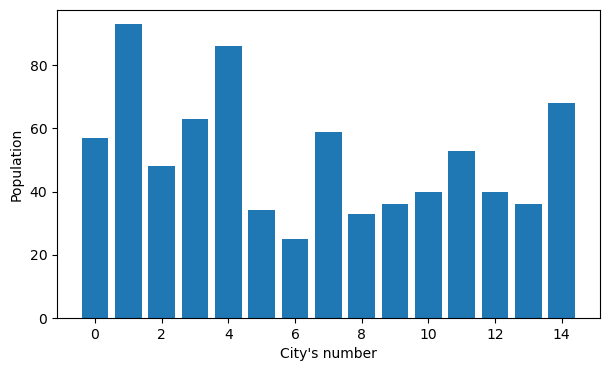

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)
cities = np.random.randint(10, 100, 15)

plt.figure(figsize=(7, 4))
plt.bar(np.arange(len(cities)), cities)
plt.xlabel('City\'s number')
plt.ylabel('Population')
plt.show()

Задаем функцию, которая определяет номер следующего города, куда отправляется кандитат (возможно, остается в текущем городе). Для простоты будем перемещаться только в города с номерами на 1 больше или меньше, чем текущий:

In [8]:
def step(current, cities):
    direction = np.random.choice([-1, 1])
    target = (current + direction) % len(cities)
    ratio = cities[target] / cities[current]
    return target if np.random.rand() < ratio else current

 Моделируем перемещения кандитата за период 10000 дней:

In [10]:
walk = []
current = 1 # стартуем из города с номером 1
for i in range(10000):
    current = step(current, cities)
    walk.append(current)

Рисуем гистограмму распределения доли времени, проведенного в каждом городе:



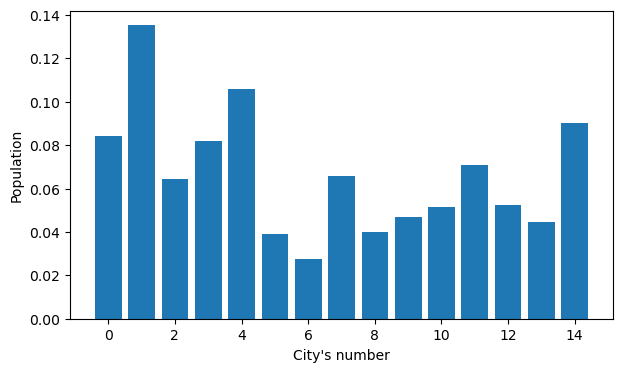

In [11]:
plt.figure(figsize=(7, 4))
plt.hist(walk, bins=np.arange(len(cities) + 1) - 0.5, rwidth=0.8, density=True)
plt.xlabel('City\'s number')
plt.ylabel('Population')
plt.show()

Полученная гистограмма почти не отличается от гистограммы, задающей распределения числа жителей по городам. Таким образом, массив walk можно рассматривать как выборку из данного распределения, а предложенный процесс обхода городов - как генератор случайных чисел из этого распределения.

Несколько замечаний:

Полезно отбросить начальный кусок массива walk, пока последовательность не вышла на стационарный режим
В нашей реализации соседные элементы массива walk сильно скоррелированы (по определению, они отличаются не более чем на 1). Поэтому полезно проредить ряд.

Общая идея MCMC:

построить эргодическую цепь Маркова, для которой стационарное распределение - это в точности наше заданное распределение

инициировать блуждание по цепи Маркова из некоторого начального состояния и дождаться, когда распределение сойдется в стационарному. С этого момента состояния цепи Маркова можно считать выборкой из желаемого распределения.

Одним из способов реализации этой идеи является алгоритм Метрополиса — Гастингса (Metropolis — Hastings):

пусть  𝜋  -- распределение на множестве  𝑅𝑑 , из которого хотим научиться моделировать случайные величины
выберем произвольное  𝑋0  из  𝑅𝑑  в качестве первого элемента последовательности
далее для каждого  𝑖 :
для текущего  𝑋𝑖  смоделируем значение  𝑍𝑖+1  из  𝑑 -мерного гауссовского распределения  𝑁(𝑋𝑖,𝜎2𝐼) 
смоделируем случайную величину  𝛼  из распределения Бернулли с вероятностью успеха
𝑝=min(1,𝜋(𝑋𝑖)𝜋(𝑍𝑖+1)) 
если  𝛼  = 1, то  𝑋𝑖+1=𝑍𝑖+1 , иначе  𝑋𝑖+1=𝑋𝑖 .
Утверждается, что распределение  𝑋𝑖  с ростом  𝑖  сходится к  𝜋 .

Несколько замечаний:

Выбор именно гауссовского распределения не существенен. Подойдет любое симметричное распределение, являющееся переходной плотностью цепи Маркова с состояниями на всем  𝑅𝑑 .
Поскольку в формуле участвует только отношение плотностей, достаточно знать плотность с точностью до множителя-константы.

Реализуем алгоритм Метрополиса — Гастингса. Функция metroplis принимает на вход

начальное состояние цепи Маркова (start)
функцию, вычисляющую значение плотности в произвольной точке (функция value)
функцию, предлагающую выбор нового состояния (функция proposal)
количество итераций (niter)

In [16]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.

    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

В приложение к предыдущей задаче вот как определяются value и proposal и как выглядит гистограмма, полученная по смоделированной выборке:

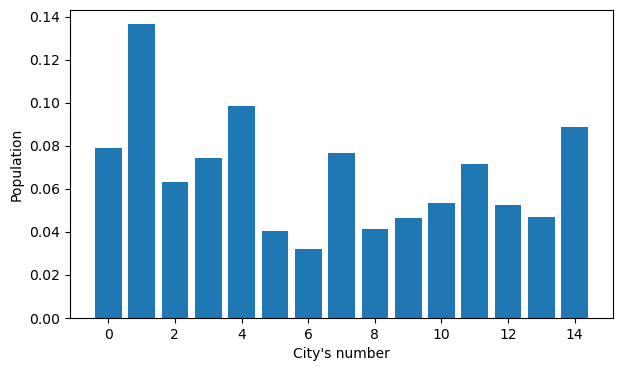

In [17]:
value = lambda x: cities[x]
proposal = lambda x: (x + np.random.choice([-1, 1])) % len(cities)
post = metroplis(1, value, proposal, 10000)

plt.figure(figsize=(7, 4))
plt.hist(post, bins=np.arange(len(cities) + 1) - 0.5, rwidth=0.8, density=True)
plt.xlabel('City\'s number')
plt.ylabel('Population')
plt.show()

Далее рассмотрим применение алгоритма Метрополиса — Гастингса для генерации выборки из смеси двух гауссиан (конечно, эту задачу можно решить и другими методами). Плотность смеси задается в виде p(x) = 0.3N(-4, 2) + 0.7N(3, 6), где N(a, b) - плотность нормального распределения со средним a и дисперсией b. Для наглядности, ниже приведен график плотности смеси.

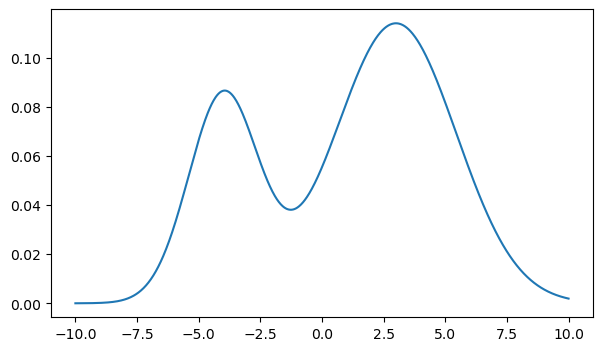

In [18]:
from scipy.stats import norm

x = np.linspace(-10, 10, 1000)

def mixture(x, **kwargs):
  _ = kwargs
  return 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)

plt.figure(figsize=(7, 4))
plt.plot(x, mixture(x))
plt.show()

Задаем функцию, которая моделирует шаг величиной из нормального распределения с некоторой дисперсией  𝜎2 :



In [20]:
def proposal(current, sigma, **kwargs):
    _ = kwargs
    current = np.asarray(current)
    sigma = np.asarray(sigma)
    return current + sigma * np.random.randn(*current.shape)

Моделируем последовательность длины 10000 по алгоритму Метрополиса — Гастингса:

[ ]
post = metroplis(3, mixture, proposal, 10000, sigma=1)


In [21]:
post = metroplis(3, mixture, proposal, 10000, sigma=1)

Сравниваем искомую плотность и плотность по полученной выборке:

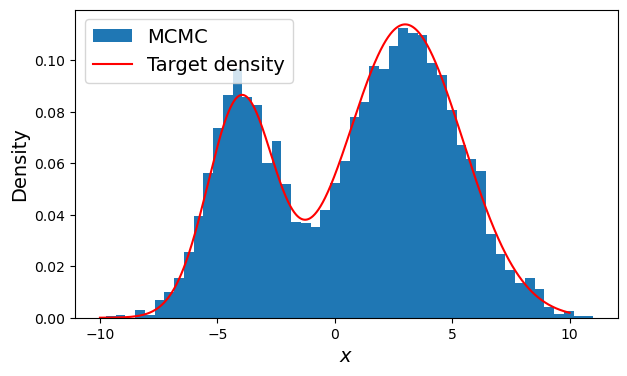

In [23]:
plt.figure(figsize=(7, 4))
plt.hist(post[1000:], bins=50, density=True, label='MCMC')
plt.plot(x, mixture(x), label='Target density', c='r')
plt.legend(fontsize=14)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

Мы выбрали  𝜎=1 . Что будет если этот параметр шага изменить? Ниже на каринке траектория процесса  𝑋𝑖  для разных  𝜎 . Видно, что шаги с  𝜎=0.1  слишком маленькие, процесс долго топчется на месте. Для  𝜎=1  процесс время от времени прыгает их одной моды распределения в другую и это хорошо. Попробуйте предположить и проверить, что будет, если увеличить  𝜎 .



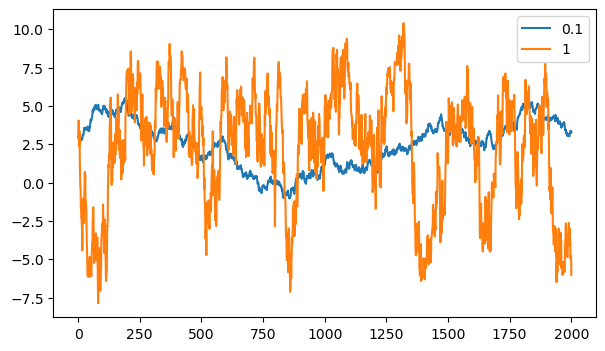

In [24]:
plt.figure(figsize=(7, 4))
for sigma in [0.1, 1]:
    post = metroplis(3, mixture, proposal, 2000, sigma=sigma)
    plt.plot(post, label=sigma)
plt.legend()
plt.show()

Дальше пример того, как ведет себя процесс, выходящих из разных стартовых точек. Видно, что роль стартовой точки быстро теряется (процесс ее "забывает") и это хорошо:

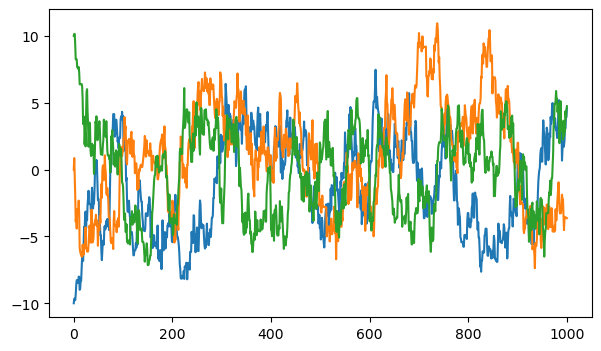

In [25]:
plt.figure(figsize=(7, 4))
for start in [-10, 0, 10]:
    post = metroplis(start, mixture, proposal, 1000, sigma=1)
    plt.plot(post)
plt.show()

Несколько важных замечаний.

Как понять, что последовательность вышла на стационарный режим? Для этого применяют статистические тесты на стационарность. Например, тест на однородность выборок в двух непересекающихся кусках последовательности.
Как понять, с каким шагом прореживать выборку, чтобы элементы стали независимыми? Построить автокорреляционную функцию -- график корреляции  𝑐𝑜𝑟𝑟(𝑋𝑖,𝑋𝑖+𝑘 ) для разных  𝑘  и найти, при каком  𝑘  корреляция становится маленькой.

Задание 5. Методом Метрополиса — Гастингса постройте выборку из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей B = [[40, -26], [-26, 25]]. Сравните плоность по выборке (двумерную гистограмму) и теоретическую плотность.

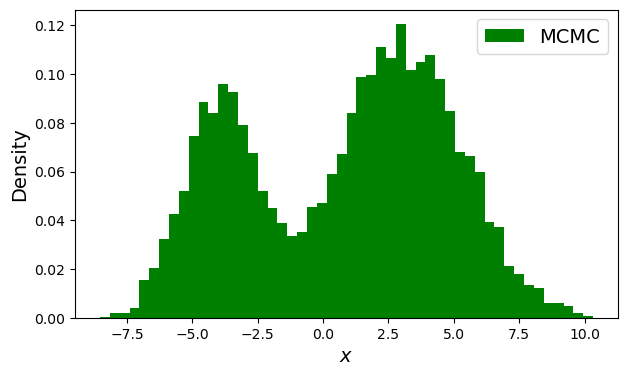

In [70]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    cur = start
    post = [cur]
    for i in range(niter):
        proposed = proposal(cur, **kwargs)
        p = value(proposed, **kwargs) / value(cur, **kwargs)
        if np.random.rand() < p:
            cur= proposed
        post.append(cur)
    return post[nburn:]
value = lambda x: cities[x]
def proposal(cur, sigma, **kwargs):
    _ = kwargs
    cur = np.asarray(cur)
    sigma = np.asarray(sigma)
    return cur + sigma * np.random.randn(*cur.shape)

post = metroplis(3, mixture, proposal, 10000, sigma=1)
plt.figure(figsize=(7, 4))
plt.hist(post[1000:], bins=50, density=True, color ='g', label='MCMC')

plt.legend(fontsize=14)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

Задание 6. Решите задачу 5 методом cэмплирования по Гиббсу.

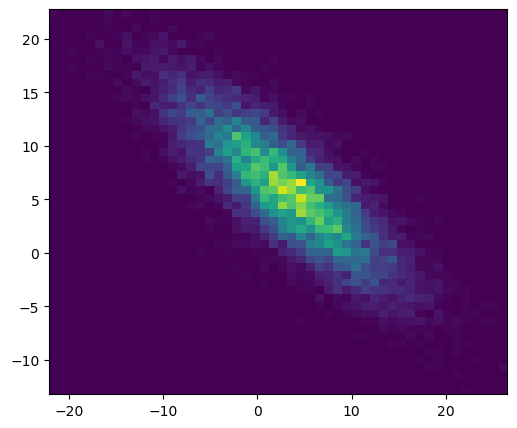

In [93]:

import numpy as np
import matplotlib.pyplot as plt

mean = np.array([3, 6])
meann = ([[3],[6]])
cov = np.array([[40, -26], [-26, 25]])
A = np.linalg.cholesky(cov)

def gibs_sampl(n, t):
    samp = []
    samp.append(n)
    for i in range (1,t):
        #используя норм распр
        y = np.random.normal(6 - (26/40)*(samp[i-1][0]-3), np.sqrt(25 - 26**2/40))
        x = np.random.normal(3 - (26/25)*(y-6), np.sqrt(40 - 26**2/25))
        tmp = [x, y]
        samp.append(tmp)
    return samp
g = gibs_sampl([0,0],10000)
#генерация из многомерного нормального распределения
s = A @ np.random.randn(2, 10000)+ meann
samples = np.array(g)
#гистограмма для миетода гиббса 
plt.figure(figsize=(13, 5))
plt.subplot(1,2,1)
plt.hist2d(samples[:, 0], samples[:, 1], bins=50)
plt.show()


